# Оператор мобильной связи: рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Загрузка и изучение файла

In [1]:
!pip install jupyter_black -q

Импортируем необходимые библиотеки

In [2]:
# импорт pandas и необходимых библиотек
import jupyter_black
import pandas as pd
import seaborn as sns
import warnings

from joblib import dump, load
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore")

jupyter_black.load()

Откроем файл, прочтем и запишем в переменную.

In [3]:
# чтение csv-файла в датафрейм с сохранением в переменную df
df = pd.read_csv("dataset.csv")

Изучим общую информацию о полученном датафрейме

In [4]:
# вывод основной информации о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
# вывод первых 10-ти строчек датафрейма
df.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [6]:
# вывод информации о типах данных в датафрейме
df.dtypes

calls       float64
minutes     float64
messages    float64
mb_used     float64
is_ultra      int64
dtype: object

Исправим тип данных в столбцах `'calls'` и `'messages'` на целочисленный

In [7]:
# преобразование типа данных в целочисленный
df[["calls", "messages"]] = df[["calls", "messages"]].astype(int)

Проверим преобразование типа данных

In [8]:
# вывод информации о типах данных в датафрейме
df.dtypes

calls         int64
minutes     float64
messages      int64
mb_used     float64
is_ultra      int64
dtype: object

Попробуем изучить закономерности, корреляции и распределения между целевым признаком и остальными,\
используя парный график.

Text(0.5, 1.02, 'Парный график по видам тарифа')

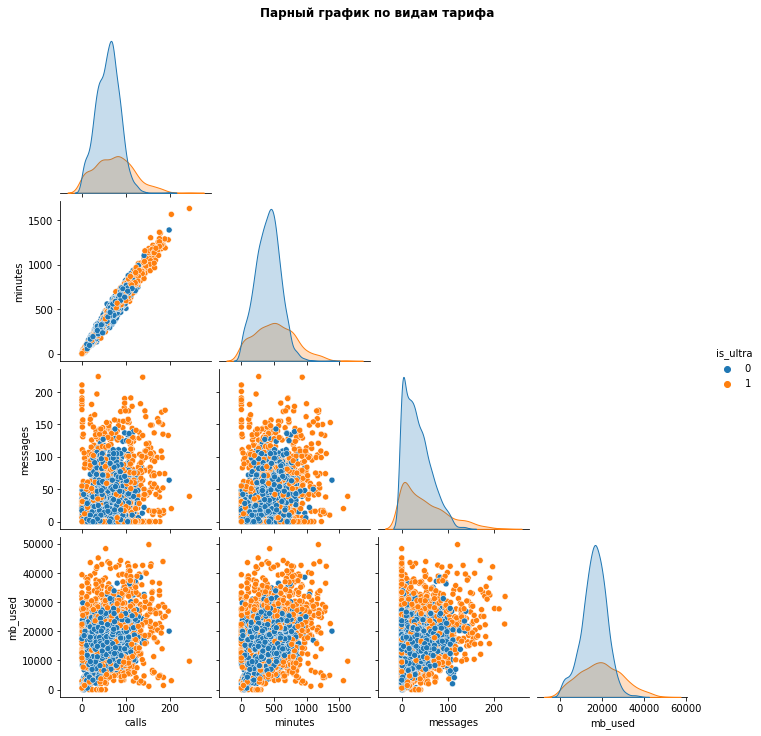

In [9]:
# вывод парного графика
pp = sns.pairplot(df, hue="is_ultra", corner=True)
pp.fig.suptitle("Парный график по видам тарифа", y=1.02, weight="bold")

На графике видно, целевой признак "is_ultra" имеет больший разброс значений "1", чем значений "0" для всех признаков.

***

**Вывод:**

1. В датафрейме 5 столбцов, 3214 строк
2. Тип данных в столбцах `'calls'` и `'messages'` был преобразован на целочисленный

## Разбиение данных на выборки

В бизнес-задаче с подбором подходящего тарифа целевым признаком является значение столбца `'is_ultra'`\
Остальные столбцы датафрейма: `'calls'`, `'minutes'`, `'messages'`, `'mb_used'` -  являются признаками.

Разделим данные на выборки:
- обучающую - 60% данных
- валидационную - 20% данных
- тестовую - 20% данных.

In [10]:
# извлечение признаков
features = df.drop(["is_ultra"], axis=1)
# извлечение целевого признака
target = df["is_ultra"]

# отделение 40 % данных для вадидационной выборки
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345
)
# разделение вадидационной выборки на валидационную и тестовую часть
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345
)

Проверим разбиение на выборки

In [11]:
print("Размеры:")
print(f" - обучающей выборки features_train: {features_train.shape}")
print(f" - обучающей выборки target_train: {target_train.shape[0]}")
print(f" - валидационной выборки features_valid: {features_valid.shape}")
print(f" - валидационной выборки target_valid: {target_valid.shape[0]}")
print(f" - тестовой выборки features_test: {features_test.shape}")
print(f" - тестовой выборки target_test: {target_test.shape[0]}")

Размеры:
 - обучающей выборки features_train: (1928, 4)
 - обучающей выборки target_train: 1928
 - валидационной выборки features_valid: (643, 4)
 - валидационной выборки target_valid: 643
 - тестовой выборки features_test: (643, 4)
 - тестовой выборки target_test: 643


***

**Вывод:**

Датафрейм был поделен на выборки:
- обучающую - 60% данных
- валидационную - 20% данных
- тестовую - 20% данных.

## Исследование моделей

Так как целевой признак категориальный, будем решать задачи классификации.

Создадим и исследуем модели:
- модель дерева решений - *DecisionTreeClassifier*
- модель случайного леса - *RandomForestClassifier*
- модель логистической регрессии - *LogisticRegression*

### Модель дерева решений

Создадим модель дерева решений,\
оценим правильность предсказаний модели для различных значений набора гиперпараметров:
- максимальная глубина дерева (***max_depth***) - от 1 до 10;
- минимальное количество примеров для разделения (***min_samples_split***) - от 10 до 100 с шагом 10

In [12]:
# объявление переменных
best_model = None
best_result_decision_tree = 0.5
best_depth = 0
best_min_samples_split = 0

# цикл для применения набора гиперпараметров
for depth in range(1, 11):
    for samples in range(10, 101, 10):

        model = DecisionTreeClassifier(
            max_depth=depth, min_samples_split=samples, random_state=12345
        )  # создание объекта класса DecisionTreeClassifier

        model.fit(features_train, target_train)  # обучение модели

        predictions_valid = model.predict(
            features_valid
        )  # получение предсказания для признаков в валидационной выборке

        result = accuracy_score(
            target_valid, predictions_valid
        )  # вычисление доли правильных ответов в валидационной выборке

        if (
            result > best_result_decision_tree
        ):  # сохранение лучших результатов в переменные
            best_model = model
            best_result_decision_tree = result
            best_depth = depth
            best_min_samples_split = samples

# вывод информации по модели с лучшим качеством
print("Лучшая модель дерева решений имеет гиперпараметры:")
print(f" - максимальная глубина дерева - {best_depth}")
print(f" - минимальное количество примеров для разделения - {best_min_samples_split}")
print(f"Качество модели - {round(best_result_decision_tree, 3)}")

Лучшая модель дерева решений имеет гиперпараметры:
 - максимальная глубина дерева - 6
 - минимальное количество примеров для разделения - 20
Качество модели - 0.788


Проверим скорость обучения созданной модели дерева решений с заданными гиперпараметрами

In [13]:
%%timeit -n 10
best_model.fit(features_train, target_train)

5.45 ms ± 488 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Проверим скорость работы созданной модели дерева решений с заданными гиперпараметрами

In [14]:
%%timeit -n 10
best_model.predict(features_valid)

1.38 ms ± 197 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Сохраним модель

In [15]:
# сохранение модели
dump(best_model, "model_decision_tree.joblib");

### Модель случайного леса

Создадим модель случайного леса,\
оценим правильность предсказаний модели для различных значений набора гиперпараметров:
- максимальная глубина дерева (***max_depth***) - от 1 до 10;
- количество деревьев (***n_estimators***) - от 10 до 50 с шагом 10

In [16]:
# объявление переменных
best_model = None
best_result_random_forest = 0.5
best_depth = 0
best_est = 10

# цикл для применения набора гиперпараметров
for est in range(10, 51, 10):
    for depth in range(1, 11):

        model = RandomForestClassifier(
            random_state=12345, n_estimators=est, max_depth=depth
        )  # создание объекта класса RandomForestClassifier

        model.fit(features_train, target_train)  # обучение модели

        predictions_valid = model.predict(
            features_valid
        )  # получение предсказания для признаков в валидационной выборке

        result = accuracy_score(
            target_valid, predictions_valid
        )  # вычисление доли правильных ответов в валидационной выборке

        if (
            result > best_result_random_forest
        ):  # сохранение лучших результатов в переменные
            best_model = model
            best_result_random_forest = result
            best_depth = depth
            best_est = est

# вывод информации по модели с лучшим качеством
print("Лучшая модель случайного леса имеет гиперпараметры:")
print(f" - максимальная глубина дерева - {best_depth}")
print(f" - количество деревьев - {best_est}")
print(f"Качество модели - {round(best_result_random_forest, 3)}")

Лучшая модель случайного леса имеет гиперпараметры:
 - максимальная глубина дерева - 8
 - количество деревьев - 40
Качество модели - 0.809


Проверим скорость обучения созданной модели случайного леса с заданными гиперпараметрами

In [17]:
%%timeit -n 10
best_model.fit(features_train, target_train)

121 ms ± 3.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Проверим скорость работы созданной модели случайного леса с заданными гиперпараметрами

In [18]:
%%timeit -n 10
best_model.predict(features_valid)

8.17 ms ± 199 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Сохраним модель

In [19]:
# сохранение модели
dump(best_model, "model_random_forest.joblib");

### Модель логистической регрессии

Создадим модель логистической регрессии,\
оценим правильность предсказаний модели для различных значений набора гиперпараметров:
- выбор алгоритма (***solver***) - "*lbfgs*", "*liblinear*" или "*newton-cg*";
- максимальное количество итераций (***max_iter***) - от 10 до 50 с шагом 10

In [20]:
# объявление переменных
best_model = None
best_result_logistic_regression = 0.5
best_iter = 0
best_solver = ""
solvers = ["lbfgs", "liblinear", "newton-cg"]

# цикл для применения набора гиперпараметров
for iters in range(10, 101, 10):
    for solver in solvers:

        model = LogisticRegression(
            random_state=12345, solver=solver, max_iter=iters
        )  # создание объекта класса LogisticRegression

        model.fit(features_train, target_train)  # обучение модели

        predictions_valid = model.predict(
            features_valid
        )  # получение предсказания для признаков в валидационной выборке

        result = accuracy_score(
            target_valid, predictions_valid
        )  # вычисление доли правильных ответов в валидационной выборке

        if (
            result > best_result_logistic_regression
        ):  # сохранение лучших результатов в переменные
            best_model = model
            best_result_logistic_regression = result
            best_iter = iters
            best_solver = solver

# вывод информации по модели с лучшим качеством
print("Лучшая модель логистической регрессии имеет гиперпараметры:")
print(f" - алгоритм - '{best_solver}'")
print(f" - количество итераций - {best_iter}")
print(f"Качество модели - {round(best_result_logistic_regression, 3)}")

Лучшая модель логистической регрессии имеет гиперпараметры:
 - алгоритм - 'newton-cg'
 - количество итераций - 40
Качество модели - 0.757


Проверим скорость обучения созданной модели логистической регрессии с заданными гиперпараметрами

In [21]:
%%timeit -n 10
best_model.fit(features_train, target_train)

88.2 ms ± 3.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Проверим скорость работы созданной модели логистической регрессии с заданными гиперпараметрами

In [22]:
%%timeit -n 10
best_model.predict(features_valid)

1.26 ms ± 88.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Сохраним модель

In [23]:
# сохранение модели
dump(best_model, "model_logistic_regression.joblib");

***

***Вывод:***

1. Были созданы и исследованы модели:
   - модель дерева решений - DecisionTreeClassifier
   - модель случайного леса - RandomForestClassifier
   - модель логистической регрессии - LogisticRegression
2. Лучшая модель дерева решений имеет гиперпараметры:
   - максимальная глубина дерева - 6
   - минимальное количество примеров для разделения - 20\
   Качество модели - 0.788\
   Скорость работы - ~ 1.3 ms\
   Скорость обучения - ~ 6.0 ms
3. Лучшая модель случайного леса имеет гиперпараметры:
   - максимальная глубина дерева - 8
   - количество деревьев - 40\
   Качество модели - 0.809\
   Скорость работы - ~ 8.2 ms\
   Скорость обучения - ~ 120 ms
4. Лучшая модель логистической регрессии имеет гиперпараметры:
   - алгоритм - "newton-cg"
   - количество итераций - 40\
   Качество модели - 0.757\
   Скорость работы - ~ 1.2 ms\
   Скорость обучения - ~ 85.0 ms
5. Лучшая модель по качеству - модель случайного леса
6. Лучшая модель по скорости работы - модель логистической регрессии
7. Лучшая модель по скорости обучения - модель дерева решений

|Модель|Качество|Скорость работы|Скорость обучения|
|:-|-:|:-:|:-:|
|Модель дерева решений|0.788|~ 1.3 ms|~ 6.0 ms|
|Модель случайного леса|0.809|~ 8.2 ms|~ 120.0 ms|
|Модель логистической регрессии|0.757|~ 1.2 ms|~ 85.0 ms|

7. Для небольших датафреймов скорость обработки данных не критична,\
   поэтому лучшая модель - модель случайного леса с самым высоким качеством.
8. Для больших объемов данных скорость обработки и обучения модели критична,\
   поэтому лучшая модель - модель дерева решений.\
   Скорость работы моделей дерева решений и логистической регрессии практически одинакова,\
   а качество модели дерева решений выше.

## Проверьте модель на тестовой выборке

Так как критерии выбора моделей не известны (качество, скорость работы или скорость обучения),\
отберем для проверки модели, лучшие по качеству или по скорости, а именно:
- модель случайного леса с самым высоким качеством;
- модель дерева решений с высокой скоростью обучения и работы.

### Проверка работы модели дерева решений

Загрузим модель дерева решений и проверим её работу на тестовой выборке

In [24]:
# загрузка модели
model_decision_tree = load("model_decision_tree.joblib")

In [25]:
# получение предсказания для признаков в тестовой выборке
dt_predictions_test = model_decision_tree.predict(features_test)
# вычисление доли правильных ответов в тестовой выборке
dt_accuracy_test = accuracy_score(target_test, dt_predictions_test)

# вывод информации
print(f"Доля правильных ответов в тестовой выборке: {round(dt_accuracy_test, 3)}")
print(
    f"Доля правильных ответов в валидационной выборке: {round(best_result_decision_tree, 3)}"
)
print(
    f"Доля правильных ответов снизилась на {round(best_result_decision_tree-dt_accuracy_test, 3)}"
)

Доля правильных ответов в тестовой выборке: 0.779
Доля правильных ответов в валидационной выборке: 0.788
Доля правильных ответов снизилась на 0.009


Замерим скорость работы модели

In [26]:
%%timeit -n 10
model_decision_tree.predict(features_test)

1.36 ms ± 285 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Проверка работы модели случайного леса

Загрузим модель случайного леса и проверим её работу на тестовой выборке

In [27]:
# загрузка модели
model_random_forest = load("model_random_forest.joblib")

In [28]:
# получение предсказания для признаков в тестовой выборке
rf_predictions_test = model_random_forest.predict(features_test)
# вычисление доли правильных ответов в тестовой выборке
rf_accuracy_test = accuracy_score(target_test, rf_predictions_test)

# вывод информации
print(f"Доля правильных ответов в тестовой выборке: {round(rf_accuracy_test, 3)}")
print(
    f"Доля правильных ответов в валидационной выборке: {round(best_result_random_forest, 3)}"
)
print(
    f"Доля правильных ответов снизилась на {round(best_result_random_forest-rf_accuracy_test, 3)}"
)

Доля правильных ответов в тестовой выборке: 0.796
Доля правильных ответов в валидационной выборке: 0.809
Доля правильных ответов снизилась на 0.012


Замерим скорость работы модели

In [29]:
%%timeit -n 10
model_random_forest.predict(features_test)

8.78 ms ± 334 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


**Вывод:**

1. Качество работы всех моделей на тестовой выборке снизилось,\
   а скорость осталась прежней.

|<br> Модель|Качество на тестовой выборке <br> снизилось на|<br> и составляет|Скорость <br> на тестовой выборке|
|:-|:-:|:-:|:-:|
|Модель дерева решений|0.009|0.779|~1.3 ms|
|Модель случайного леса|0.012|0.796|~8.5 ms|

2. Выводы по выбору модели остались прежними:
   - Для небольших датафреймов скорость обработки данных не критична,\
     поэтому лучшая модель - модель случайного леса с самым высоким качеством.
   - Для больших объемов данных скорость обработки критична,\
     поэтому лучшая модель - модель дерева решений.\